In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

# Load data
data = np.fromfile('./ws1.dat', dtype=np.float64, sep="\n")

# Sort data
ordered_data = np.sort(data)

# Create bins for histogram using class intervals defined by equal probability
mean = np.mean(data)
variance = np.var(data)

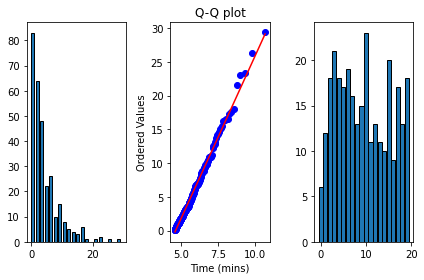

In [27]:
num_bins=20

# Start creating histogram with bins of equal width
fig, ax = plt.subplots(nrows=1, ncols=4)


n, bins, patches = ax[0].hist(data, bins=num_bins, width=0.9, edgecolor='black')


# Create Q-Q plot
stats.probplot(x=data, dist='expon', plot=ax[1], sparams=(mean))
ax[1].set_title('Q-Q plot')
ax[1].set_xlabel('Time (mins)')


# Create histogram with bins of equal probability
class_intervals = np.fromfunction(lambda i: stats.expon.ppf(i/num_bins, scale=mean), shape=(num_bins,))

# Add max value to class intervals to ensure that last bin is shown on chart
class_intervals = np.append(class_intervals, np.ceil(np.max(data)))

n, bins = np.histogram(data, bins=class_intervals)



ax[3].bar(range(len(class_intervals)-1), n, width=0.9, edgecolor='black')


fig.tight_layout()
# ax[2].hist(data, bins=class_intervals, edgecolor='black')
